<a href="https://colab.research.google.com/github/sftSalman/tensorflowBasic/blob/main/Classification_CustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-07-25 09:20:28--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   107MB/s    in 1.3s    

2022-07-25 09:20:29 (107 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import zipfile

In [ ]:
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
import os 

In [ ]:
train_horse_dir = os.path.join('/content/horse-or-human/horses')

In [ ]:
train_human_dir = os.path.join('/content/horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horsse_dir)
print(train_horse_names[:10])


['horse29-4.png', 'horse17-6.png', 'horse39-5.png', 'horse13-6.png', 'horse33-2.png', 'horse12-8.png', 'horse40-8.png', 'horse35-7.png', 'horse30-2.png', 'horse50-3.png']


In [ ]:
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['human10-17.png', 'human06-25.png', 'human01-26.png', 'human12-14.png', 'human08-18.png', 'human13-01.png', 'human06-18.png', 'human03-08.png', 'human03-15.png', 'human07-03.png']


In [ ]:
print(len(os.listdir(train_horse_dir)))

500


In [ ]:
print(len(os.listdir(train_human_dir)))

527


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4 
ncols = 4
pic_index = 0


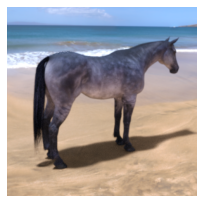

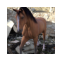

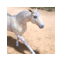

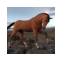

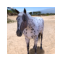

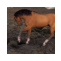

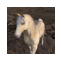

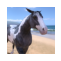

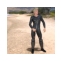

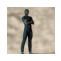

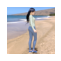

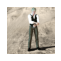

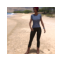

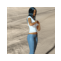

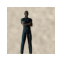

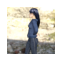

In [ ]:
fig = plt.gcf()
fig.set_size_inches(nclos*4, nrows*4)
pic_index = pic_index +8 
next_horse_pix = [os.path.join(train_horsse_dir,fname) for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname) for fname in train_human_name[pic_index-8:pic_index]]
for i , img_path in enumerate(nex_horse_pic+next_human_pic):
  sp = plt.subplot(nrows,nclos, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.show()

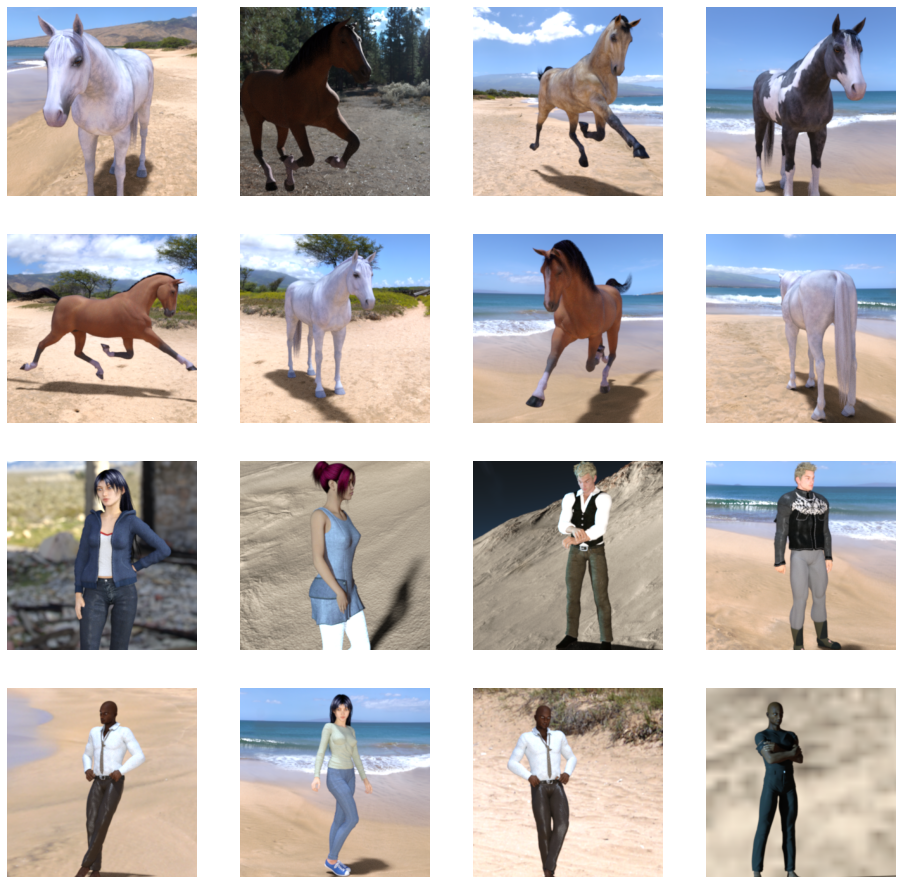

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf 

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr =0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory('/content/horse-or-human',
                                                    target_size = (300,300),
                                                    batch_size = 128,
                                                    class_mode = 'binary'
    
)

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs = 15,
                    verbose=2) # 8*128 = total images 

Epoch 1/15
8/8 - 20s - loss: 0.9719 - accuracy: 0.4805 - 20s/epoch - 2s/step
Epoch 2/15
8/8 - 6s - loss: 0.7985 - accuracy: 0.5706 - 6s/epoch - 743ms/step
Epoch 3/15
8/8 - 6s - loss: 0.7476 - accuracy: 0.6496 - 6s/epoch - 741ms/step
Epoch 4/15
8/8 - 6s - loss: 0.6225 - accuracy: 0.6774 - 6s/epoch - 751ms/step
Epoch 5/15
8/8 - 6s - loss: 1.1469 - accuracy: 0.7664 - 6s/epoch - 728ms/step
Epoch 6/15
8/8 - 6s - loss: 0.5126 - accuracy: 0.7953 - 6s/epoch - 741ms/step
Epoch 7/15
8/8 - 6s - loss: 0.3132 - accuracy: 0.8977 - 6s/epoch - 739ms/step
Epoch 8/15
8/8 - 6s - loss: 0.1776 - accuracy: 0.9333 - 6s/epoch - 724ms/step
Epoch 9/15
8/8 - 6s - loss: 0.0596 - accuracy: 0.9789 - 6s/epoch - 740ms/step
Epoch 10/15
8/8 - 6s - loss: 0.4713 - accuracy: 0.8587 - 6s/epoch - 741ms/step
Epoch 11/15
8/8 - 6s - loss: 0.2747 - accuracy: 0.8954 - 6s/epoch - 745ms/step
Epoch 12/15
8/8 - 7s - loss: 0.0967 - accuracy: 0.9678 - 7s/epoch - 822ms/step
Epoch 13/15
8/8 - 6s - loss: 0.1667 - accuracy: 0.9399 - 6s/ep

In [ ]:
import numpy as np 
from google.colab import files 
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving horse19-6.png to horse19-6.png
[2.2356799e-05]
horse19-6.png is a horse


In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving human07-01.png to human07-01.png
[0.99873024]
human07-01.png is a human


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs= model.input, outputs = successive_outputs)


horse_img_files = [os.path.join(train_horse_dir,f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir,f ) for f in train_human_names]
img_path = random.choice(horse_img_files+human_img_files)

#img = load_img(img_path,target_size(300,300))
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,)+ x.shape)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


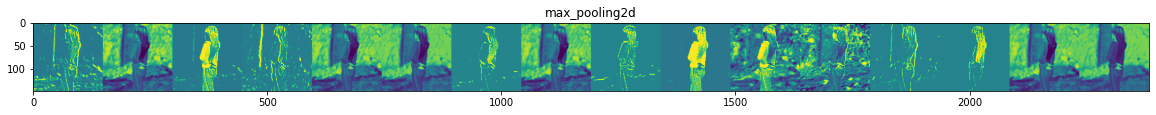

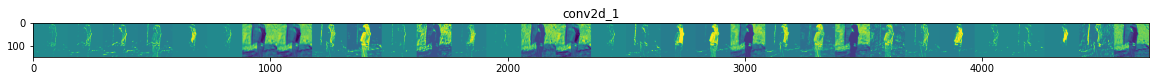

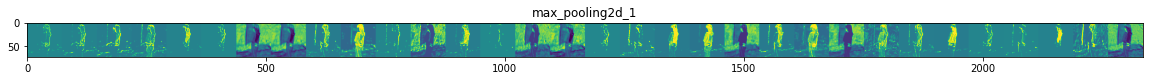

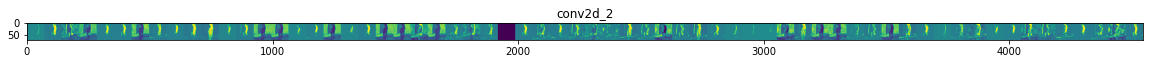

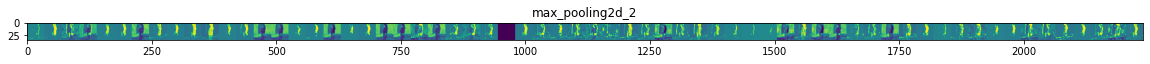

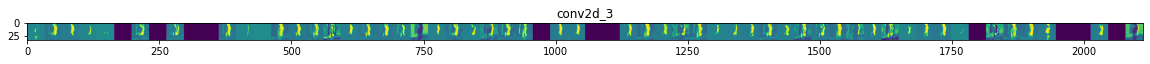

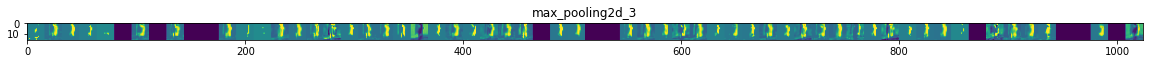

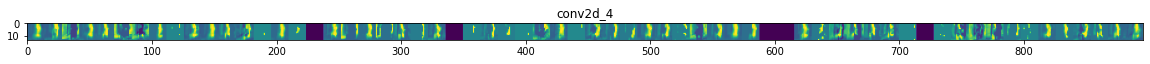

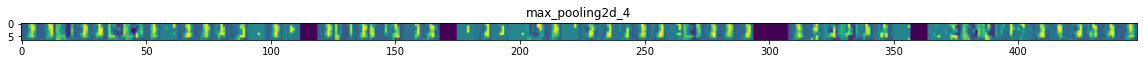

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# all explanation is here for upper visulization 
#https://www.analyticsvidhya.com/blog/2020/11/tutorial-how-to-visualize-feature-maps-directly-from-cnn-layers/